In [ ]:
# here we will see the step wise  exploratory data analysis
# in which we use some data to expolre  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

In [3]:
df=pd.read_csv('k_circle_sales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [5]:
df. shape # our data has 8523 columns and 13 rows  

(8523, 13)

In [6]:
df. info()  # it tells us about the data type and if any column contain null value or not 
# as our data contain null values in item_weight, outlet_size, outlet_location_type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [7]:
# mean of the column 
df['Item_Weight'].mean()  

11.67673977360451

In [8]:
# median
df['Item_Weight'].median()

11.8

In [10]:
# mode
df['Item_Fat_Content'].mode()[0]

'Low Fat'

In [17]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
# range
df['Item_MRP'].max()- df['Item_MRP'].min()

235.59999999999997

In [19]:
# inter quartile range in the data
df['Item_MRP'].quantile(0.75)-df['Item_MRP'].quantile(0.25)

91.84999999999998

In [20]:
# variance
df['Item_MRP'].var()

3876.0708845928852

In [21]:
# standard deveation 
df['Item_MRP'].std()

62.2580989477906

In [23]:
# coefficent of variation 
print('coefficent of variation', df['Item_MRP'].std()/df['Item_MRP'].mean())
print('% of coefficent of variation ', df['Item_MRP'].std()/df['Item_MRP'].mean()*100)

coefficent of variation 0.4415504385557973
% of coefficent of variation  44.15504385557973


In [24]:
# Descriptive data
df.describe() # gives the descrption of the numerical columns


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


In [25]:
# for both numerical and categorical data 
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
count,8523,7774.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,6473,8523,8523.000000,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,8,4,NaN,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 2,Supermarket Type1,NaN,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,2793,5577,NaN,NaN
mean,NaN,11.676740,NaN,0.066132,NaN,140.998838,NaN,1997.831867,NaN,NaN,NaN,2181.288914,13.414514
std,NaN,5.776851,NaN,0.051598,NaN,62.258099,NaN,8.371760,NaN,NaN,NaN,1706.499616,1.701840
min,NaN,0.000000,NaN,0.000000,NaN,31.300000,NaN,1985.000000,NaN,NaN,NaN,33.290000,0.100000
25%,NaN,7.720000,NaN,0.026989,NaN,93.800000,NaN,1987.000000,NaN,NaN,NaN,834.247400,13.150000
50%,NaN,11.800000,NaN,0.053931,NaN,142.700000,NaN,1999.000000,NaN,NaN,NaN,1794.331000,13.900000
75%,NaN,16.500000,NaN,0.094585,NaN,185.650000,NaN,2004.000000,NaN,NaN,NaN,3101.296400,14.300000


In [26]:
df['Item_MRP'].describe() # of the particular columns


count    8523.000000
mean      140.998838
std        62.258099
min        31.300000
25%        93.800000
50%       142.700000
75%       185.650000
max       266.900000
Name: Item_MRP, dtype: float64

In [27]:
df.skew() # tells skewness of the data 

C:\Users\HP\AppData\Local\Temp\ipykernel_6848\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Item_Weight                 -0.352215
Item_Visibility              1.167091
Item_MRP                     0.127390
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Profit                      -3.379808
dtype: float64

In [28]:
df['Item_MRP'].skew() # of the particular colum

0.12738985338612047

In [29]:
# kurtosis 
df.kurt()

C:\Users\HP\AppData\Local\Temp\ipykernel_6848\105079409.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Item_Weight                  -0.613755
Item_Visibility               1.679445
Item_MRP                     -0.887901
Outlet_Establishment_Year    -1.205694
Item_Outlet_Sales             1.615877
Profit                       16.965881
dtype: float64

In [30]:
df['Item_MRP'].kurt() # tells the kurtosis  of the columns 

-0.8879008549272447

In [31]:
# correlation 
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
Item_Weight,1.000000,-0.055081,0.020616,0.365815,-0.034997,-0.016058
Item_Visibility,-0.055081,1.000000,-0.001597,-0.074834,-0.128625,0.014269
Item_MRP,0.020616,-0.001597,1.000000,0.005046,0.567555,0.004109
Outlet_Establishment_Year,0.365815,-0.074834,0.005046,1.000000,-0.049135,-0.019674
Item_Outlet_Sales,-0.034997,-0.128625,0.567555,-0.049135,1.000000,0.000951
Profit,-0.016058,0.014269,0.004109,-0.019674,0.000951,1.000000


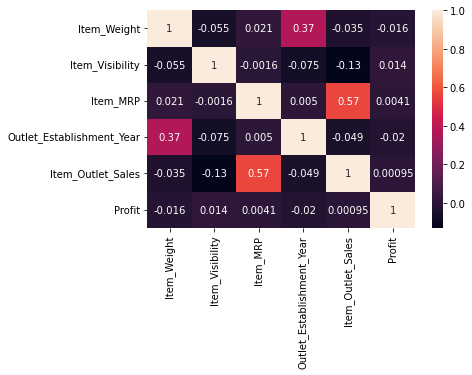

In [33]:
# heat map is used to tells to find the corelation between the variables 
sns.heatmap(df.corr(),annot=True)
plt.show()

In [34]:
df.cov() # tells the full covariance in the data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
Item_Weight,33.372008,-0.016030,7.425851,16.293339,-3.295708e+02,-0.160196
Item_Visibility,-0.016030,0.002662,-0.005131,-0.032325,-1.132561e+01,0.001253
Item_MRP,7.425851,-0.005131,3876.070885,2.629821,6.029901e+04,0.435364
Outlet_Establishment_Year,16.293339,-0.032325,2.629821,70.086372,-7.019621e+02,-0.280298
Item_Outlet_Sales,-329.570782,-11.325611,60299.006078,-701.962133,2.912141e+06,2.762921
Profit,-0.160196,0.001253,0.435364,-0.280298,2.762921e+00,2.896258


In [36]:
# encoding in the data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [37]:
# first we convert outlet_size into numeric variables 
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [42]:
df['outlet_size_label']=df['Outlet_Size'].replace({'Small':0,'Medium':1,'High':2})
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,outlet_size_label
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,1.0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,1.0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,1.0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,2.0


In [ ]:
# we can also use one hot encoding
#pd.get_dummies(data=dataframe_name, columns=colname) syntax for one hot encoding

In [ ]:
# code for frequency encoding 
#freq = df[colname].value_counts(normalize=True)
# df[colname].replace(freq)

In [46]:
# now we will do scalig in the data  here we are using standard scaler
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
z_values=sc.fit_transform(df[['Item_MRP','Item_Weight']])
z_values

array([[ 1.74768499, -0.41145126],
       [-1.48903161, -0.99658275],
       [ 0.00965652,  1.00809849],
       ...,
       [-0.89790917, -0.18640069],
       [-0.6087732 , -0.77326333],
       [-1.05211502,  0.54068577]])

In [48]:
z_df=pd.DataFrame(z_values, columns=[['Item_MRP','Item_Weight']])
z_df

,Item_MRP,Item_Weight
0,1.747685,-0.411451
1,-1.489032,-0.996583
2,0.009657,1.008098
3,0.660212,1.302395
4,-1.399078,-0.475504
...,...,...
8518,1.180657,-0.832988
8519,-0.526851,-0.570718
8520,-0.897909,-0.186401
8521,-0.608773,-0.773263


In [49]:
z = (df['Item_Weight'] - df['Item_Weight'].mean())/ (df['Item_Weight'].std())
z

0      -0.411425
1      -0.996519
2       1.008034
3       1.302312
4      -0.475474
          ...   
8518   -0.832935
8519   -0.570681
8520   -0.186389
8521   -0.773214
8522    0.540651
Name: Item_Weight, Length: 8523, dtype: float64

In [53]:
# here we do min max scaler
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
min_max_values=mm.fit_transform(df[['Item_Weight','Item_MRP']])
min_max_values

array([[0.43559719, 0.92741935],
       [0.27728337, 0.0721562 ],
       [0.81967213, 0.46816638],
       ...,
       [0.49648712, 0.22835314],
       [0.33770492, 0.30475382],
       [0.69320843, 0.18760611]])

In [59]:
mm_df=pd.DataFrame(min_max_values,columns=['Item_Weight','Item_MRP'])
mm_df.head()

,Item_Weight,Item_MRP
0,0.435597,0.927419
1,0.277283,0.072156
2,0.819672,0.468166
3,0.899297,0.640068
4,0.418267,0.095925


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

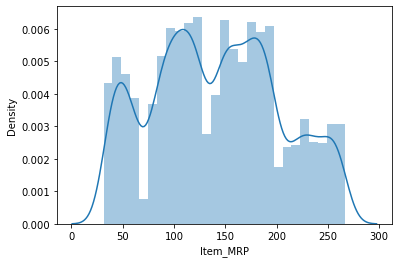

In [54]:
# now we see the data skewness
sns.distplot(df['Item_MRP'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

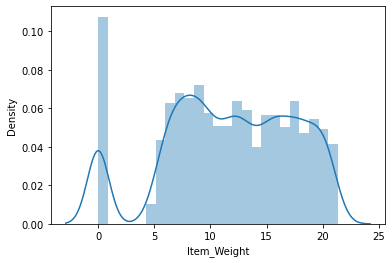

In [55]:
sns.distplot(df['Item_Weight'])

In [60]:
# now we will see how the skewness in the minmax scaler, standardscaler
print('skewness of the data',df['Item_Weight'].skew())
print('skewness of z scaler',z_df['Item_Weight'].skew())
print('skewness of mm scaler', mm_df['Item_Weight'].skew())

skewness of the data -0.35221469353797713
skewness of z scaler Item_Weight   -0.352215
dtype: float64
skewness of mm scaler -0.35221469353797785


In [63]:
# now we will see the kurtosis 
print('kurtosis of the data',df['Item_Weight'].kurt())
print('kurtosis of z scaler',z_df['Item_Weight'].kurt())
print('kurtosis of mm scaler',mm_df['Item_Weight'].kurt())

kurtosis of the data -0.6137545639519244
kurtosis of z scaler Item_Weight   -0.613755
dtype: float64
kurtosis of mm scaler -0.6137545639519253


In [64]:
# now we will see how we transformation of the data 
df['Item_MRP'].describe()

count    8523.000000
mean      140.998838
std        62.258099
min        31.300000
25%        93.800000
50%       142.700000
75%       185.650000
max       266.900000
Name: Item_MRP, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


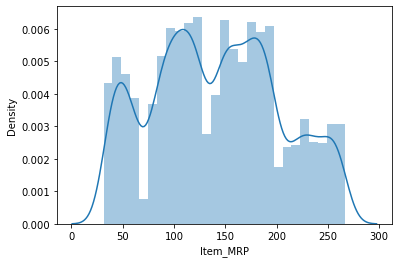

In [67]:
sns.distplot(df['Item_MRP'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


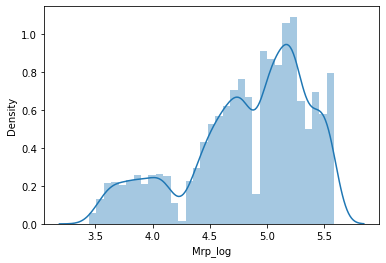

In [69]:
df['Mrp_log']=np.log(df['Item_MRP'])
sns.distplot(df['Mrp_log'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


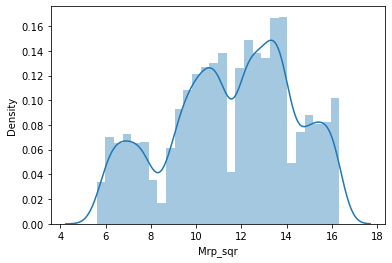

In [71]:
# square root transformation
df['Mrp_sqr']=np.sqrt(df['Item_MRP'])
sns.distplot(df['Mrp_sqr'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


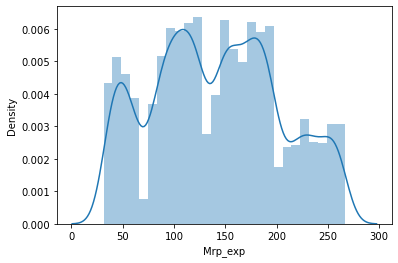

In [74]:
# exponentional transformation 
df['Mrp_exp']=np.exp(df['Mrp_log'])
sns.distplot(df['Mrp_exp'])
plt.show()

In [75]:
# now we will see box cox transformation 
from sklearn.preprocessing import PowerTransformer

In [76]:
box_cox_pt=PowerTransformer(method='box-cox')

In [77]:
df['box_cox_Item_mrp']=box_cox_pt.fit_transform(df[['Item_MRP']])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='box_cox_Item_mrp', ylabel='Density'>

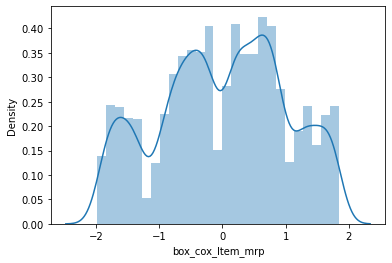

In [78]:
sns.distplot(df['box_cox_Item_mrp'])

In [84]:
# now we will see yeo-johnson transformation 
yeo_jon_pt=PowerTransformer('yeo-johnson')

In [85]:
df['yeo_johnson_Item_mrp']=box_cox_pt.fit_transform(df[['Item_MRP']])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yeo_johnson_Item_mrp', ylabel='Density'>

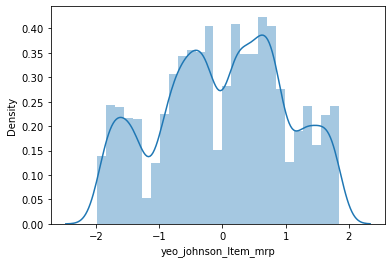

In [86]:
sns.distplot(df['yeo_johnson_Item_mrp'])